Day 6: Random Forests

Objective of the day
Learn how an ensemble of decision trees (a Random Forest) improves accuracy and reduces overfitting.

1. Big idea of Random Forest

A random forest is simply a big team of decision trees working together.

Each tree gives its own prediction (like voting).

The forest takes a majority vote (for classification) or an average (for regression).

So instead of trusting one tree (which can overfit), you combine many and get a stronger, more stable model.

Accuracy: 0.7666666666666667
              precision    recall  f1-score   support

           1       0.73      0.94      0.82        17
           2       0.88      0.54      0.67        13

    accuracy                           0.77        30
   macro avg       0.80      0.74      0.74        30
weighted avg       0.79      0.77      0.75        30



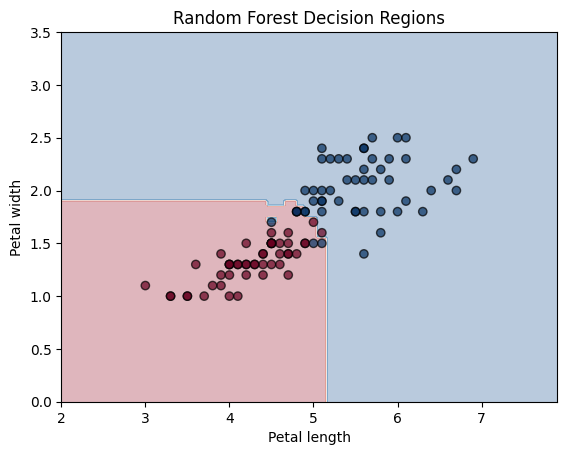

Feature importances: [0.52782515 0.47217485]


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Iris data (versicolor vs virginica, petal features)
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[iris.target != 0, 2:4]  # petal length, petal width
y = iris.target[iris.target != 0]     # versicolor=1, virginica=2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
# Estimators means the number of trees created
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="RdBu")
plt.scatter(X[:,0], X[:,1], c=y, edgecolors="k", cmap="RdBu", alpha=0.7)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Random Forest Decision Regions")
plt.show()

print("Feature importances:", rf.feature_importances_)



📊 Exercise of the Day

What accuracy does the Random Forest achieve? Compare it to the decision tree (~0.76).

Look at the decision boundary — is it smoother than the single tree? Why?

Which feature is most important according to the model?

1) Accuracy: 0.76 same as the decsion tree. The data set is not representative.

2) It is supposed to look smoother but with this little data set it really isnt.

3) Petal length

🌟 Mini-Challenge

Train Random Forests with different numbers of trees: n_estimators=1, 10, 100.

Compare their accuracies.
👉 What happens as you add more trees?

For 1 estimator I got 0.8 accuracy, and the importance of features is mostly petal width.

For 10 estimators I got 0.8 accuracy, and the importance is now for petal lenght

100 estimators which was the default gives the lowest accuracy of 0.76.